In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
customer = pd.read_csv("data/customer.csv")
shipment = pd.read_csv("data/shipment.csv")
log_perf = pd.read_csv("data/logistics_performance.csv")


In [41]:
customer['acquisition_date'] = pd.to_datetime(customer['acquisition_date'])
shipment['date'] = pd.to_datetime(shipment['date'], dayfirst=True)

log_perf['date'] = pd.to_datetime(log_perf['date'],dayfirst=True)


In [42]:
customer.isna().sum()
shipment.isna().sum()
log_perf.isna().sum()



date                             0
region                           0
carrier                          0
shipments_processed              0
delay_hours_avg                  0
fuel_price_usd_per_barrel        0
warehouse_utilization_percent    0
damage_claims_count              0
dtype: int64

In [43]:
customer['acquisition_date'] = pd.to_datetime(customer['acquisition_date'])
shipment['date'] = pd.to_datetime(shipment['date'])
log_perf['date'] = pd.to_datetime(log_perf['date'])


In [44]:
# 1) Clean up column names (remove spaces etc.)
shipment.columns = shipment.columns.str.strip()
customer.columns = customer.columns.str.strip()

print("Shipment columns:\n", shipment.columns.tolist())
print("\nCustomer columns:\n", customer.columns.tolist())

# 2) Find common columns automatically
common_cols = set(shipment.columns) & set(customer.columns)
print("\nCommon columns between shipment and customer:\n", common_cols)


Shipment columns:
 ['shipment_id', 'type', 'date', 'product_category', 'origin', 'O_Country', 'destination', 'D_Country', 'value', 'freight_cost', 'customs_clearance_time_days', 'delivery_status']

Customer columns:
 ['customer_id', 'acquisition_date', 'acquisition_cost_usd', 'market_segment', 'supplier_id', 'order_id', 'order_date', 'order_value_usd', 'payment_date', 'satisfaction_score', 'support_tickets', 'lead_time_days']

Common columns between shipment and customer:
 set()


In [45]:
# Example: avg order value by market segment
customer.groupby('market_segment')['order_value_usd'].mean()

# Example: satisfaction vs order value
customer[['satisfaction_score', 'order_value_usd']].corr()



,satisfaction_score,order_value_usd
satisfaction_score,1.000000,0.195613
order_value_usd,0.195613,1.000000


In [46]:
customer.columns = customer.columns.str.strip()
shipment.columns = shipment.columns.str.strip()
log_perf.columns = log_perf.columns.str.strip()

customer['acquisition_date'] = pd.to_datetime(customer['acquisition_date'])
customer['order_date'] = pd.to_datetime(customer['order_date'])
customer['payment_date'] = pd.to_datetime(customer['payment_date'])

shipment['date'] = pd.to_datetime(shipment['date'])
log_perf['date'] = pd.to_datetime(log_perf['date'])


In [47]:
print("Shipment columns:\n", shipment.columns.tolist())
print("\nCustomer columns:\n", customer.columns.tolist())
print("\nLogistics performance columns:\n", log_perf.columns.tolist())



Shipment columns:
 ['shipment_id', 'type', 'date', 'product_category', 'origin', 'O_Country', 'destination', 'D_Country', 'value', 'freight_cost', 'customs_clearance_time_days', 'delivery_status']

Customer columns:
 ['customer_id', 'acquisition_date', 'acquisition_cost_usd', 'market_segment', 'supplier_id', 'order_id', 'order_date', 'order_value_usd', 'payment_date', 'satisfaction_score', 'support_tickets', 'lead_time_days']

Logistics performance columns:
 ['date', 'region', 'carrier', 'shipments_processed', 'delay_hours_avg', 'fuel_price_usd_per_barrel', 'warehouse_utilization_percent', 'damage_claims_count']


In [48]:
# Make sure date is datetime in both
shipment['date'] = pd.to_datetime(shipment['date'])
log_perf['date'] = pd.to_datetime(log_perf['date'])

# Merge by date
ship_ops = shipment.merge(log_perf, on="date", how="left")


In [49]:
# Example: avg order value by market segment
customer.groupby('market_segment')['order_value_usd'].mean()

# Example: satisfaction vs order value
customer[['satisfaction_score', 'order_value_usd']].corr()


,satisfaction_score,order_value_usd
satisfaction_score,1.000000,0.195613
order_value_usd,0.195613,1.000000


In [50]:
customer.columns = customer.columns.str.strip()
shipment.columns = shipment.columns.str.strip()
log_perf.columns = log_perf.columns.str.strip()

customer['acquisition_date'] = pd.to_datetime(customer['acquisition_date'])
customer['order_date'] = pd.to_datetime(customer['order_date'])
customer['payment_date'] = pd.to_datetime(customer['payment_date'])

shipment['date'] = pd.to_datetime(shipment['date'])
log_perf['date'] = pd.to_datetime(log_perf['date'])


In [51]:
customer.dtypes
shipment.dtypes
log_perf.dtypes


date                             datetime64[ns]
region                                   object
carrier                                  object
shipments_processed                       int64
delay_hours_avg                         float64
fuel_price_usd_per_barrel               float64
warehouse_utilization_percent             int64
damage_claims_count                       int64
dtype: object

In [52]:
ship_ops = shipment.merge(log_perf, on="date", how="left")


In [54]:
ship_ops.to_csv(r"C:\Users\LENOVO\Downloads\ship_ops_clean.csv", index=False)
customer.to_csv(r"C:\Users\LENOVO\Downloads\customer_clean.csv", index=False)


In [55]:
import os
os.getcwd()


'C:\\Users\\LENOVO\\Downloads\\supplychain'

In [56]:
# Merge shipment with logistics performance
ship_ops = shipment.merge(log_perf, on="date", how="left")

ship_ops.head()


,shipment_id,type,date,product_category,origin,O_Country,destination,D_Country,value,freight_cost,customs_clearance_time_days,delivery_status,region,carrier,shipments_processed,delay_hours_avg,fuel_price_usd_per_barrel,warehouse_utilization_percent,damage_claims_count
0,SHP-2024-0001,Export,2024-01-02,Electronics,Mumbai,India,New York,USA,85000,4250.0,2.1,On-Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SHP-2024-0002,Import,2024-01-03,Textiles,Shanghai,China,Mumbai,India,120000,6000.0,3.5,On-Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SHP-2024-0003,Export,2024-01-04,Consumer Goods,Mumbai,India,London,UK,45000,2250.0,1.8,On-Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SHP-2024-0004,Import,2024-01-05,Industrial Equipment,Hamburg,Germany,Mumbai,India,250000,12500.0,4.2,Delayed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SHP-2024-0005,Export,2024-01-06,Electronics,Mumbai,India,Tokyo,Japan,95000,4750.0,2.5,On-Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
customer['acquisition_date'] = pd.to_datetime(customer['acquisition_date'])
customer['order_date'] = pd.to_datetime(customer['order_date'])
customer['payment_date'] = pd.to_datetime(customer['payment_date'])


<Axes: title={'center': 'Shipment Volume Trend'}, xlabel='date'>

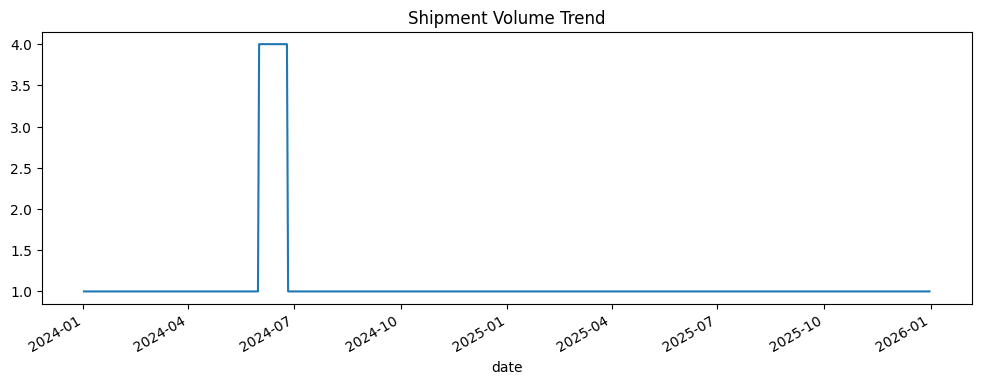

In [58]:
ship_ops.groupby('date')['shipment_id'].count().plot(figsize=(12,4), title="Shipment Volume Trend")


<Axes: title={'center': 'Freight Cost Trend'}, xlabel='date'>

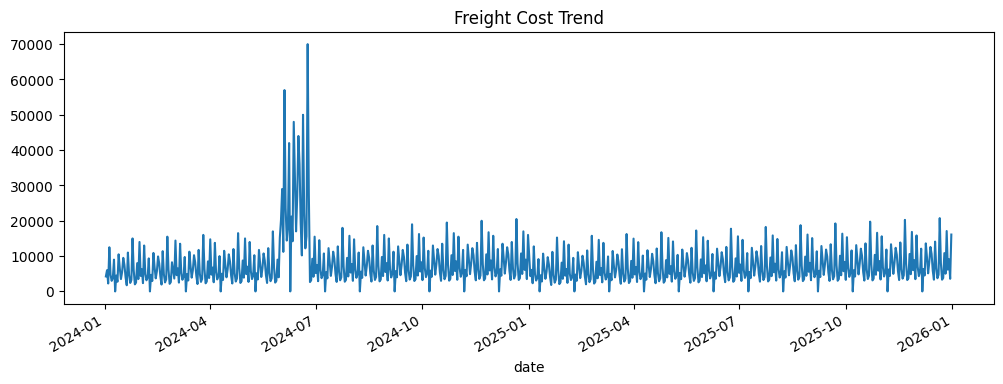

In [43]:
ship_ops.groupby('date')['freight_cost'].sum().plot(figsize=(12,4), title="Freight Cost Trend")

<Axes: xlabel='region', ylabel='delay_hours_avg'>

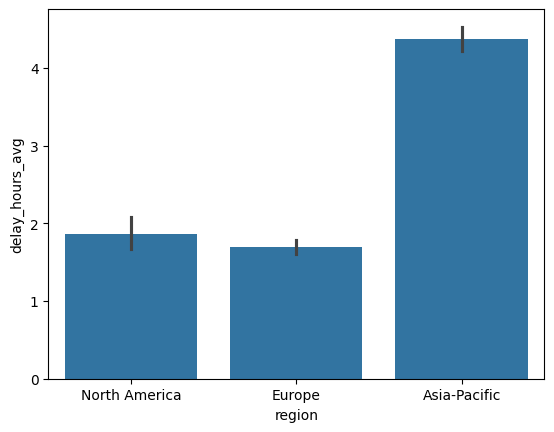

In [44]:
sns.barplot(x='region', y='delay_hours_avg', data=ship_ops)

<Axes: xlabel='damage_claims_count', ylabel='Count'>

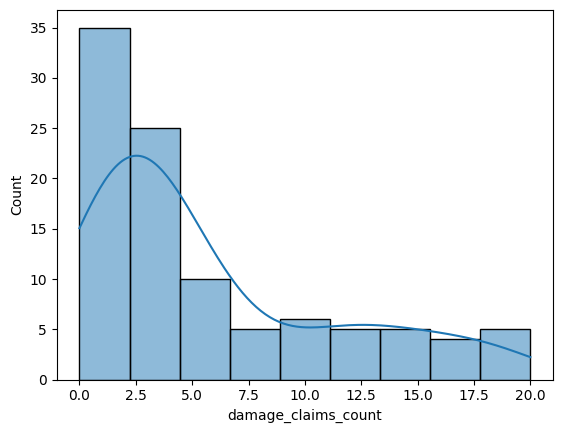

In [45]:
sns.histplot(ship_ops['damage_claims_count'], kde=True)

<Axes: xlabel='damage_claims_count', ylabel='Count'>

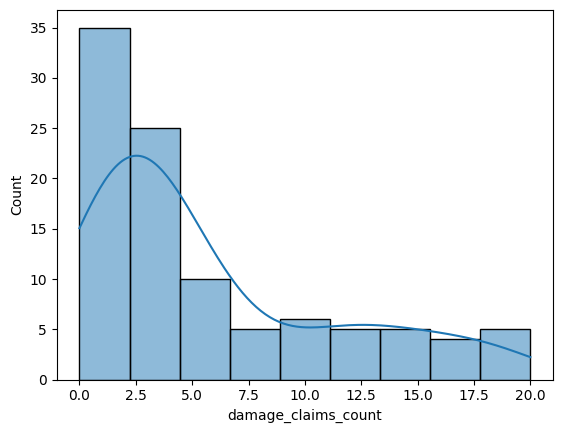

In [46]:
sns.histplot(ship_ops['damage_claims_count'], kde=True)


<Axes: xlabel='fuel_price_usd_per_barrel', ylabel='freight_cost'>

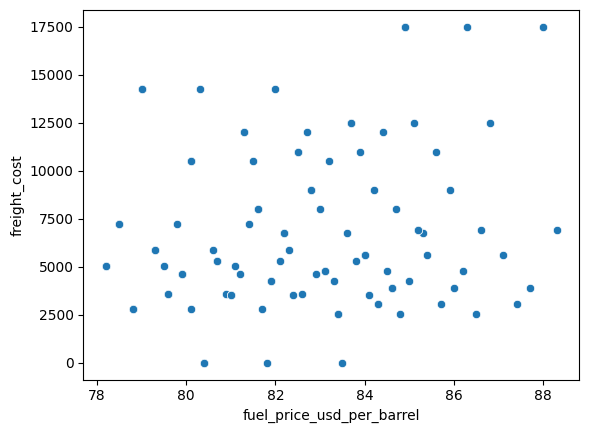

In [47]:
sns.scatterplot(x='fuel_price_usd_per_barrel', y='freight_cost', data=ship_ops)


<Axes: xlabel='market_segment'>

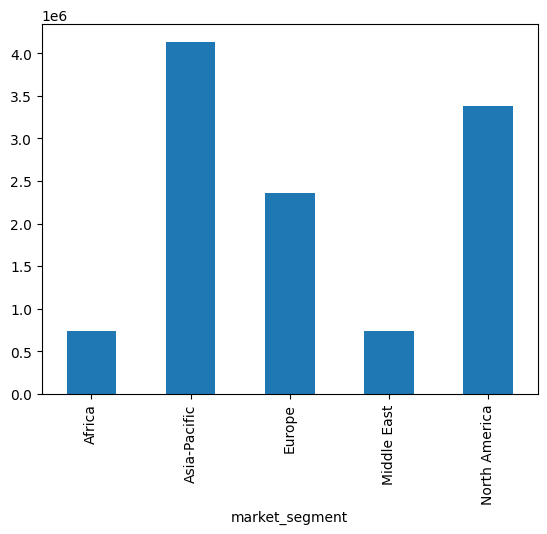

In [48]:
customer.groupby('market_segment')['order_value_usd'].sum().plot(kind='bar') 


<Axes: xlabel='satisfaction_score', ylabel='Count'>

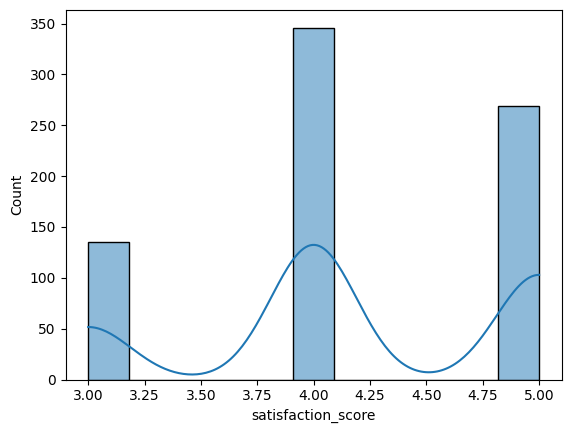

In [49]:
sns.histplot(customer['satisfaction_score'], kde=True)


<Axes: xlabel='acquisition_date'>

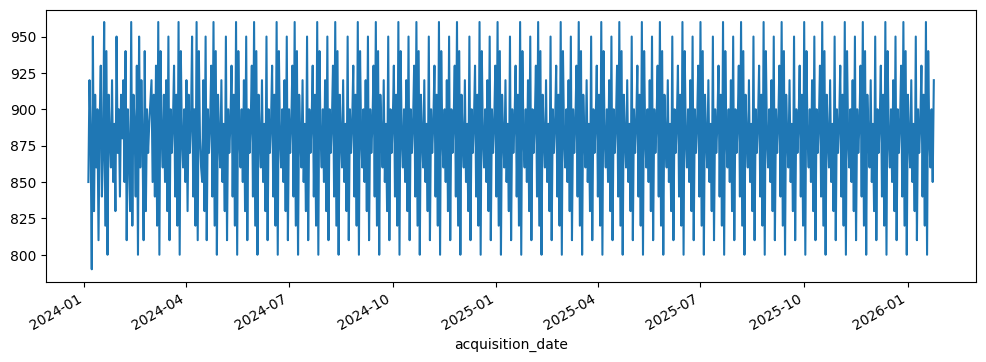

In [50]:
customer.groupby('acquisition_date')['acquisition_cost_usd'].mean().plot(figsize=(12,4))


In [51]:
customer[['order_value_usd']].describe()


,order_value_usd
count,750.000000
mean,15142.000000
std,5590.573198
min,5000.000000
25%,10000.000000
50%,15000.000000
75%,20000.000000
max,25000.000000


In [52]:
ship_ops['shipment_id'].nunique()


728

In [53]:
ship_ops['freight_cost'].sum()


np.float64(5596399.1)

In [54]:
ship_ops['delay_hours_avg'].mean()


np.float64(2.451)

In [55]:
ship_ops['value'].sum()


np.int64(112038450)

In [56]:
customer['customer_id'].nunique()


750

In [57]:
customer['order_value_usd'].mean()


np.float64(15142.0)

In [58]:
customer['satisfaction_score'].mean()


np.float64(4.1786666666666665)

In [59]:
ship_ops.to_csv("ship_ops_clean.csv", index=False)
customer.to_csv("customer_clean.csv", index=False)


<Axes: title={'center': 'Daily Shipment Volume'}, xlabel='date'>

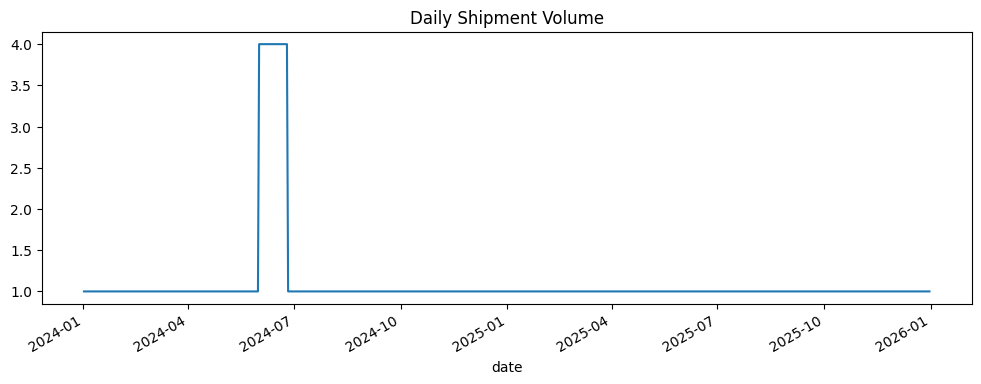

In [60]:
ship_ops.groupby('date')['shipment_id'].count().plot(
    figsize=(12, 4), 
    title="Daily Shipment Volume"
)


<Axes: title={'center': 'Freight Cost Over Time'}, xlabel='date'>

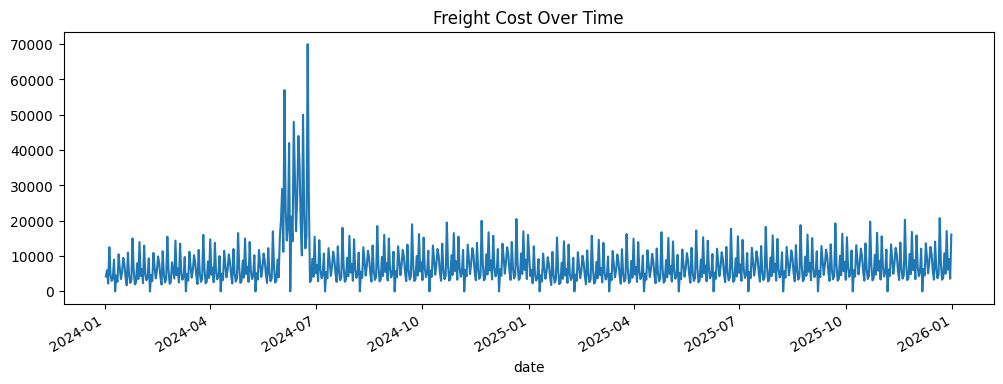

In [61]:
ship_ops.groupby('date')['freight_cost'].sum().plot(
    figsize=(12, 4),
    title="Freight Cost Over Time"
)


<Axes: xlabel='region', ylabel='delay_hours_avg'>

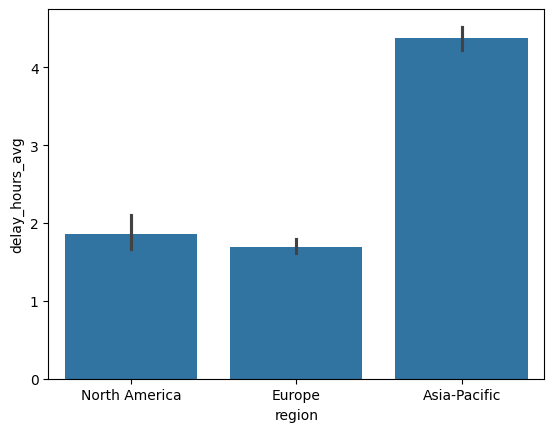

In [62]:
import seaborn as sns
sns.barplot(data=ship_ops, x='region', y='delay_hours_avg')


<Axes: xlabel='damage_claims_count', ylabel='Count'>

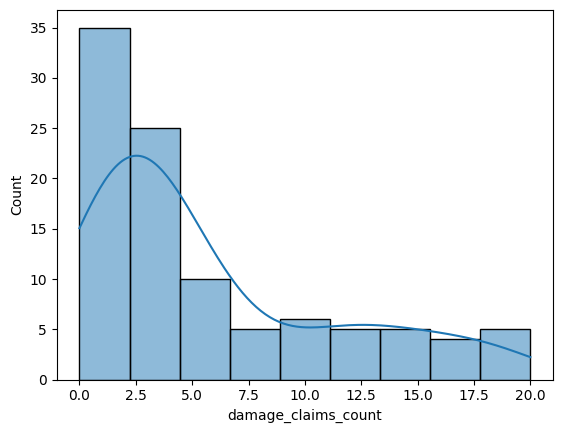

In [63]:
sns.histplot(data=ship_ops, x='damage_claims_count', kde=True)


<Axes: xlabel='fuel_price_usd_per_barrel', ylabel='freight_cost'>

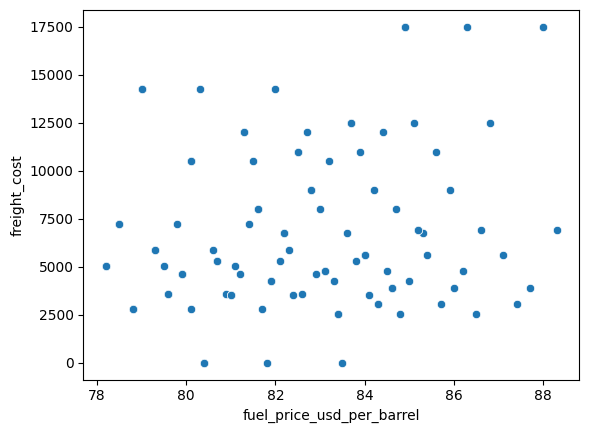

In [64]:
sns.scatterplot(
    data=ship_ops, 
    x='fuel_price_usd_per_barrel',
    y='freight_cost'
)


<Axes: title={'center': 'Warehouse Utilization Over Time'}, xlabel='date'>

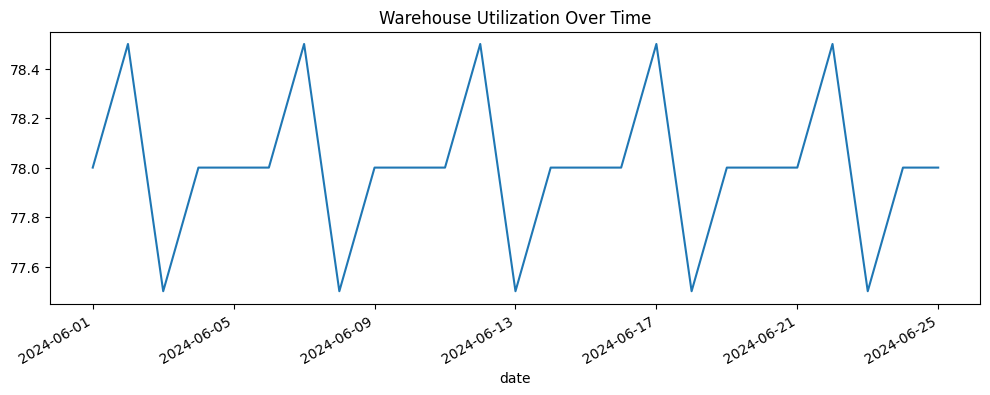

In [65]:
ship_ops.groupby('date')['warehouse_utilization_percent'].mean().plot(
    figsize=(12, 4),
    title="Warehouse Utilization Over Time"
)


<Axes: xlabel='market_segment'>

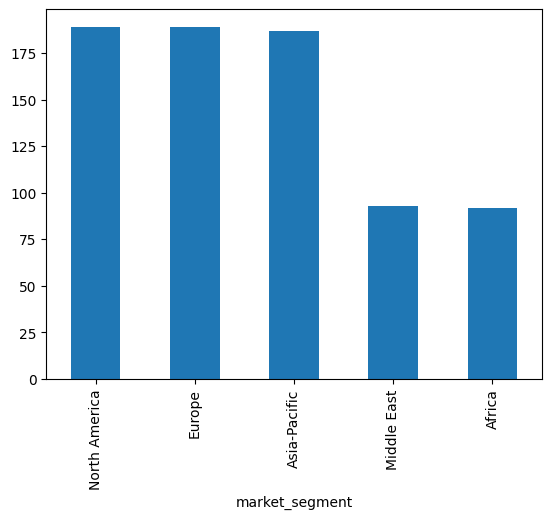

In [66]:
customer['market_segment'].value_counts().plot(kind='bar')


<Axes: xlabel='market_segment'>

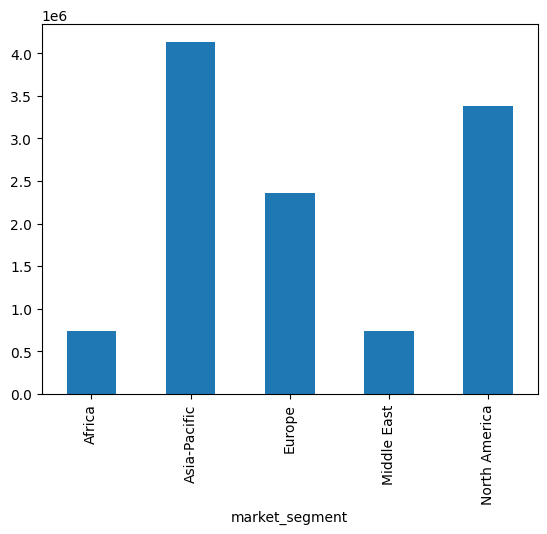

In [67]:
customer.groupby('market_segment')['order_value_usd'].sum().plot(kind='bar')


<Axes: xlabel='satisfaction_score', ylabel='Count'>

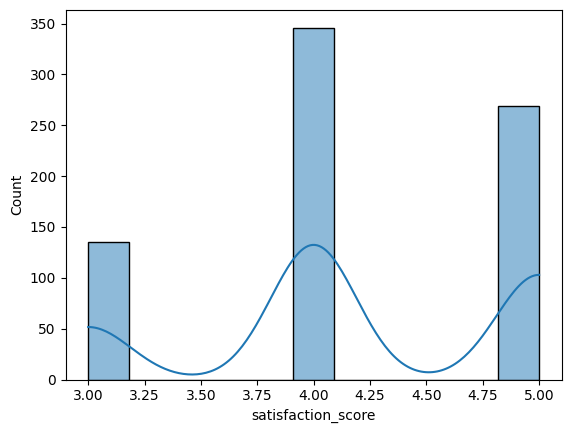

In [68]:
sns.histplot(customer['satisfaction_score'], kde=True)


<Axes: title={'center': 'CAC Trend'}, xlabel='acquisition_date'>

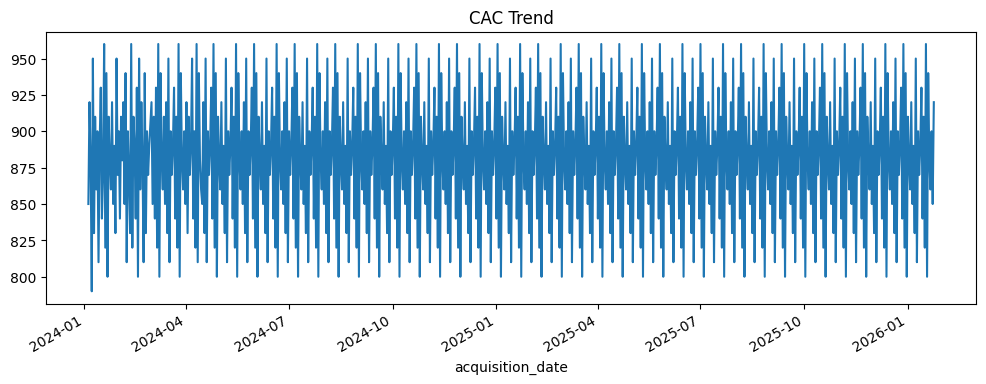

In [69]:
customer.groupby('acquisition_date')['acquisition_cost_usd'].mean().plot(
    figsize=(12,4),
    title="CAC Trend"
)


In [70]:
ship_ops.to_csv("ship_ops_clean.csv", index=False)


In [74]:
customer.to_csv("customer_clean.csv", index=False)


In [3]:
import os
os.listdir()


['.ipynb_checkpoints',
 'customer_clean.csv',
 'data',
 'ship_ops_clean.csv',
 'supply_chain_analysis.ipynb',
 'untitled.txt']

In [4]:
import pandas as pd

# Load your actual file
df = pd.read_csv("ship_ops_clean.csv")

# Identify misaligned rows (D_Country is numeric)
misaligned = df["D_Country"].astype(str).str.isnumeric()

# Shift values into correct columns
df.loc[misaligned, "delivery_status"] = df.loc[misaligned, "customs_clearance_time_days"]
df.loc[misaligned, "customs_clearance_time_days"] = df.loc[misaligned, "freight_cost"]
df.loc[misaligned, "freight_cost"] = df.loc[misaligned, "value"]
df.loc[misaligned, "value"] = df.loc[misaligned, "D_Country"].astype(int)

# Fix D_Country to "Singapore"
df.loc[misaligned, "D_Country"] = "Singapore"

# If misa column exists, drop it
if "misa" in df.columns:
    df = df.drop(columns=["misa"])

# Save cleaned file
df.to_csv("ship_ops_clean_fixed.csv", index=False)

df.head()


,shipment_id,type,date,product_category,origin,O_Country,destination,D_Country,value,freight_cost,customs_clearance_time_days,delivery_status,region,carrier,shipments_processed,delay_hours_avg,fuel_price_usd_per_barrel,warehouse_utilization_percent,damage_claims_count
0,SHP-2024-0001,Export,2024-01-02,Electronics,Mumbai,India,New York,USA,85000,4250.0,2.1,On-Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SHP-2024-0002,Import,2024-01-03,Textiles,Shanghai,China,Mumbai,India,120000,6000.0,3.5,On-Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SHP-2024-0003,Export,2024-01-04,Consumer Goods,Mumbai,India,London,UK,45000,2250.0,1.8,On-Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SHP-2024-0004,Import,2024-01-05,Industrial Equipment,Hamburg,Germany,Mumbai,India,250000,12500.0,4.2,Delayed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SHP-2024-0005,Export,2024-01-06,Electronics,Mumbai,India,Tokyo,Japan,95000,4750.0,2.5,On-Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import pandas as pd

df = pd.read_csv("ship_ops_clean_fixed.csv")

df.info()
df.head()
df.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   shipment_id                    803 non-null    object 
 1   type                           803 non-null    object 
 2   date                           803 non-null    object 
 3   product_category               803 non-null    object 
 4   origin                         803 non-null    object 
 5   O_Country                      803 non-null    object 
 6   destination                    803 non-null    object 
 7   D_Country                      803 non-null    object 
 8   value                          803 non-null    int64  
 9   freight_cost                   803 non-null    float64
 10  customs_clearance_time_days    803 non-null    float64
 11  delivery_status                803 non-null    object 
 12  region                         100 non-null    obj

,shipment_id,type,date,product_category,origin,O_Country,destination,D_Country,value,freight_cost,customs_clearance_time_days,delivery_status,region,carrier,shipments_processed,delay_hours_avg,fuel_price_usd_per_barrel,warehouse_utilization_percent,damage_claims_count
798,SHP-2025-0360,Import,2025-12-27,Industrial Equipment,Busan,South Korea,Mumbai,India,342000,17100.0,5.7,On-Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN
799,SHP-2025-0361,Export,2025-12-28,Electronics,Mumbai,India,New York,USA,123500,6175.0,3.3,On-Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800,SHP-2025-0362,Import,2025-12-29,Textiles,Shanghai,China,Mumbai,India,182000,9100.0,4.7,On-Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN
801,SHP-2025-0363,Export,2025-12-30,Consumer Goods,Mumbai,India,London,UK,71500,3575.0,3.0,On-Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN
802,SHP-2025-0364,Import,2025-12-31,Industrial Equipment,Hamburg,Germany,Mumbai,India,322000,16100.0,5.4,Delayed,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isna().sum()


shipment_id                        0
type                               0
date                               0
product_category                   0
origin                             0
O_Country                          0
destination                        0
D_Country                          0
value                              0
freight_cost                       0
customs_clearance_time_days        0
delivery_status                    0
region                           703
carrier                          703
shipments_processed              703
delay_hours_avg                  703
fuel_price_usd_per_barrel        703
warehouse_utilization_percent    703
damage_claims_count              703
dtype: int64

In [7]:
df.describe()


,value,freight_cost,customs_clearance_time_days,shipments_processed,delay_hours_avg,fuel_price_usd_per_barrel,warehouse_utilization_percent,damage_claims_count
count,803.000000,803.000000,803.000000,100.000000,100.000000,100.00000,100.000000,100.00000
mean,142173.723537,7108.686177,3.698755,1461.200000,2.451000,82.74800,78.000000,5.72000
std,83065.311830,4153.265591,0.958463,472.665513,1.263353,2.48866,12.164695,5.48106
min,35000.000000,1750.000000,1.500000,850.000000,0.900000,78.20000,58.000000,0.00000
25%,78000.000000,3900.000000,2.950000,1105.000000,1.475000,80.85000,70.250000,2.00000
50%,112000.000000,5600.000000,3.700000,1365.000000,2.050000,82.75000,80.000000,3.50000
75%,193000.000000,9650.000000,4.450000,1715.000000,3.275000,84.60000,87.750000,7.75000
max,415000.000000,20750.000000,5.900000,2370.000000,5.000000,88.30000,94.000000,20.00000


In [8]:
df["delivery_status"].value_counts()
df["region"].value_counts(dropna=False)
df["carrier"].value_counts(dropna=False)
df["O_Country"].value_counts()
df["D_Country"].value_counts()


D_Country
 India           400
 USA              83
 UK               29
 Japan            27
 UAE              27
Singapore         27
 Australia        27
 Netherlands      27
 Saudi Arabia     27
 South Africa     27
 Nigeria          27
 Mexico           27
 Egypt            24
 Brazil           24
Name: count, dtype: int64

In [9]:
df[df["D_Country"].astype(str).str.isnumeric()]


,shipment_id,type,date,product_category,origin,O_Country,destination,D_Country,value,freight_cost,customs_clearance_time_days,delivery_status,region,carrier,shipments_processed,delay_hours_avg,fuel_price_usd_per_barrel,warehouse_utilization_percent,damage_claims_count


In [10]:
df.to_csv("ship_ops_for_powerbi.csv", index=False)


In [11]:
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   shipment_id                    803 non-null    object 
 1   type                           803 non-null    object 
 2   date                           803 non-null    object 
 3   product_category               803 non-null    object 
 4   origin                         803 non-null    object 
 5   O_Country                      803 non-null    object 
 6   destination                    803 non-null    object 
 7   D_Country                      803 non-null    object 
 8   value                          803 non-null    int64  
 9   freight_cost                   803 non-null    float64
 10  customs_clearance_time_days    803 non-null    float64
 11  delivery_status                803 non-null    object 
 12  region                         100 non-null    obj

shipment_id                        0
type                               0
date                               0
product_category                   0
origin                             0
O_Country                          0
destination                        0
D_Country                          0
value                              0
freight_cost                       0
customs_clearance_time_days        0
delivery_status                    0
region                           703
carrier                          703
shipments_processed              703
delay_hours_avg                  703
fuel_price_usd_per_barrel        703
warehouse_utilization_percent    703
damage_claims_count              703
dtype: int64